In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Language Detection.csv')
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [ ]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [ ]:
df.duplicated().sum()

66

In [ ]:
df.drop_duplicates(keep='first')
df.shape

(10337, 2)

## EDA

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64


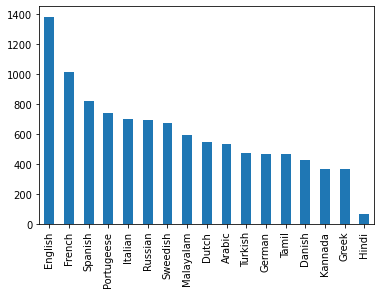

In [ ]:
print(df.Language.value_counts())
df.Language.value_counts().plot(kind='bar')
plt.show()

English       13.398472
French         9.809422
Spanish        7.922995
Portugeese     7.149076
Italian        6.752443
Russian        6.694399
Sweedish       6.539615
Malayalam      5.746348
Dutch          5.281997
Arabic         5.185257
Turkish        4.585470
German         4.546774
Tamil          4.537100
Danish         4.140466
Kannada        3.569701
Greek          3.531005
Hindi          0.609461
Name: Language, dtype: float64


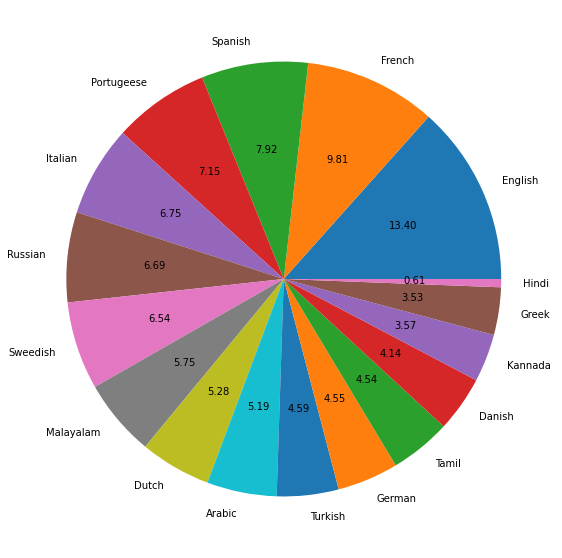

In [ ]:
print(df.Language.value_counts()/df.Language.count()*100)
plt.figure(figsize=(15,10))
plt.pie(df['Language'].value_counts(),labels=['English','French','Spanish','Portugeese','Italian','Russian','Sweedish','Malayalam','Dutch','Arabic','Turkish','German','Tamil','Danish','Kannada','Greek','Hindi'],autopct='%0.2f')
plt.show()

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

In [ ]:
# List of stop words in English
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import re
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def transform_text(text):
    text = text.lower() # Lowercsing
    text = nltk.sent_tokenize(text) # Tokenization
    text = re.sub("[^a-zA-Z]", " ", str(text)) # Remove non-letters
    text = text.translate(str.maketrans('','',string.punctuation)) # Remove punctuations
    text = re.sub(' +',' ',text) # Remove extra spaces
    text = text.strip() # Remove white spaces
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')]) # Remove stopwords
    text = ' '.join([ps.stem(word) for word in text.split()]) # Stemming
    
    return text

In [ ]:
df['Text'].apply(transform_text)

0        natur broadest sens natur physic materi world ...
1        natur refer phenomena physic world also life g...
2                             studi natur larg part scienc
3        although human part natur human activ often un...
4        word natur borrow old french natur deriv latin...
                               ...                        
10332                                                     
10333                                                     
10334                                                     
10335                                                  ess
10336                                                     
Name: Text, Length: 10337, dtype: object

In [ ]:
df['Text'][0]

' Nature, in the broadest sense, is the natural, physical, material world or universe.'

In [ ]:
# Applying LabelEncoder on target column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Language'] = le.fit_transform(df['Language'])

In [ ]:
df['Language'].unique()

array([ 3, 10,  7, 15, 11,  4,  2, 13,  6, 12,  1,  8, 16, 14,  0,  5,  9])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['Text']).toarray()

In [ ]:
X.shape

(10337, 39928)

In [ ]:
y = df['Language'].values

In [ ]:
## Applying train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9796905222437138

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: Ich bin muslim
[5]


3     1385
4     1014
13     819
11     739
8      698
12     692
14     676
10     594
2      546
0      536
16     474
5      470
15     469
1      428
9      369
6      365
7       63
Name: Language, dtype: int64